# Emergent Income Inequality using Agent-Based Modeling

### Written by Morten Tryti Berg, Henrik Haugerud Carlsen and Tor Ole Odden

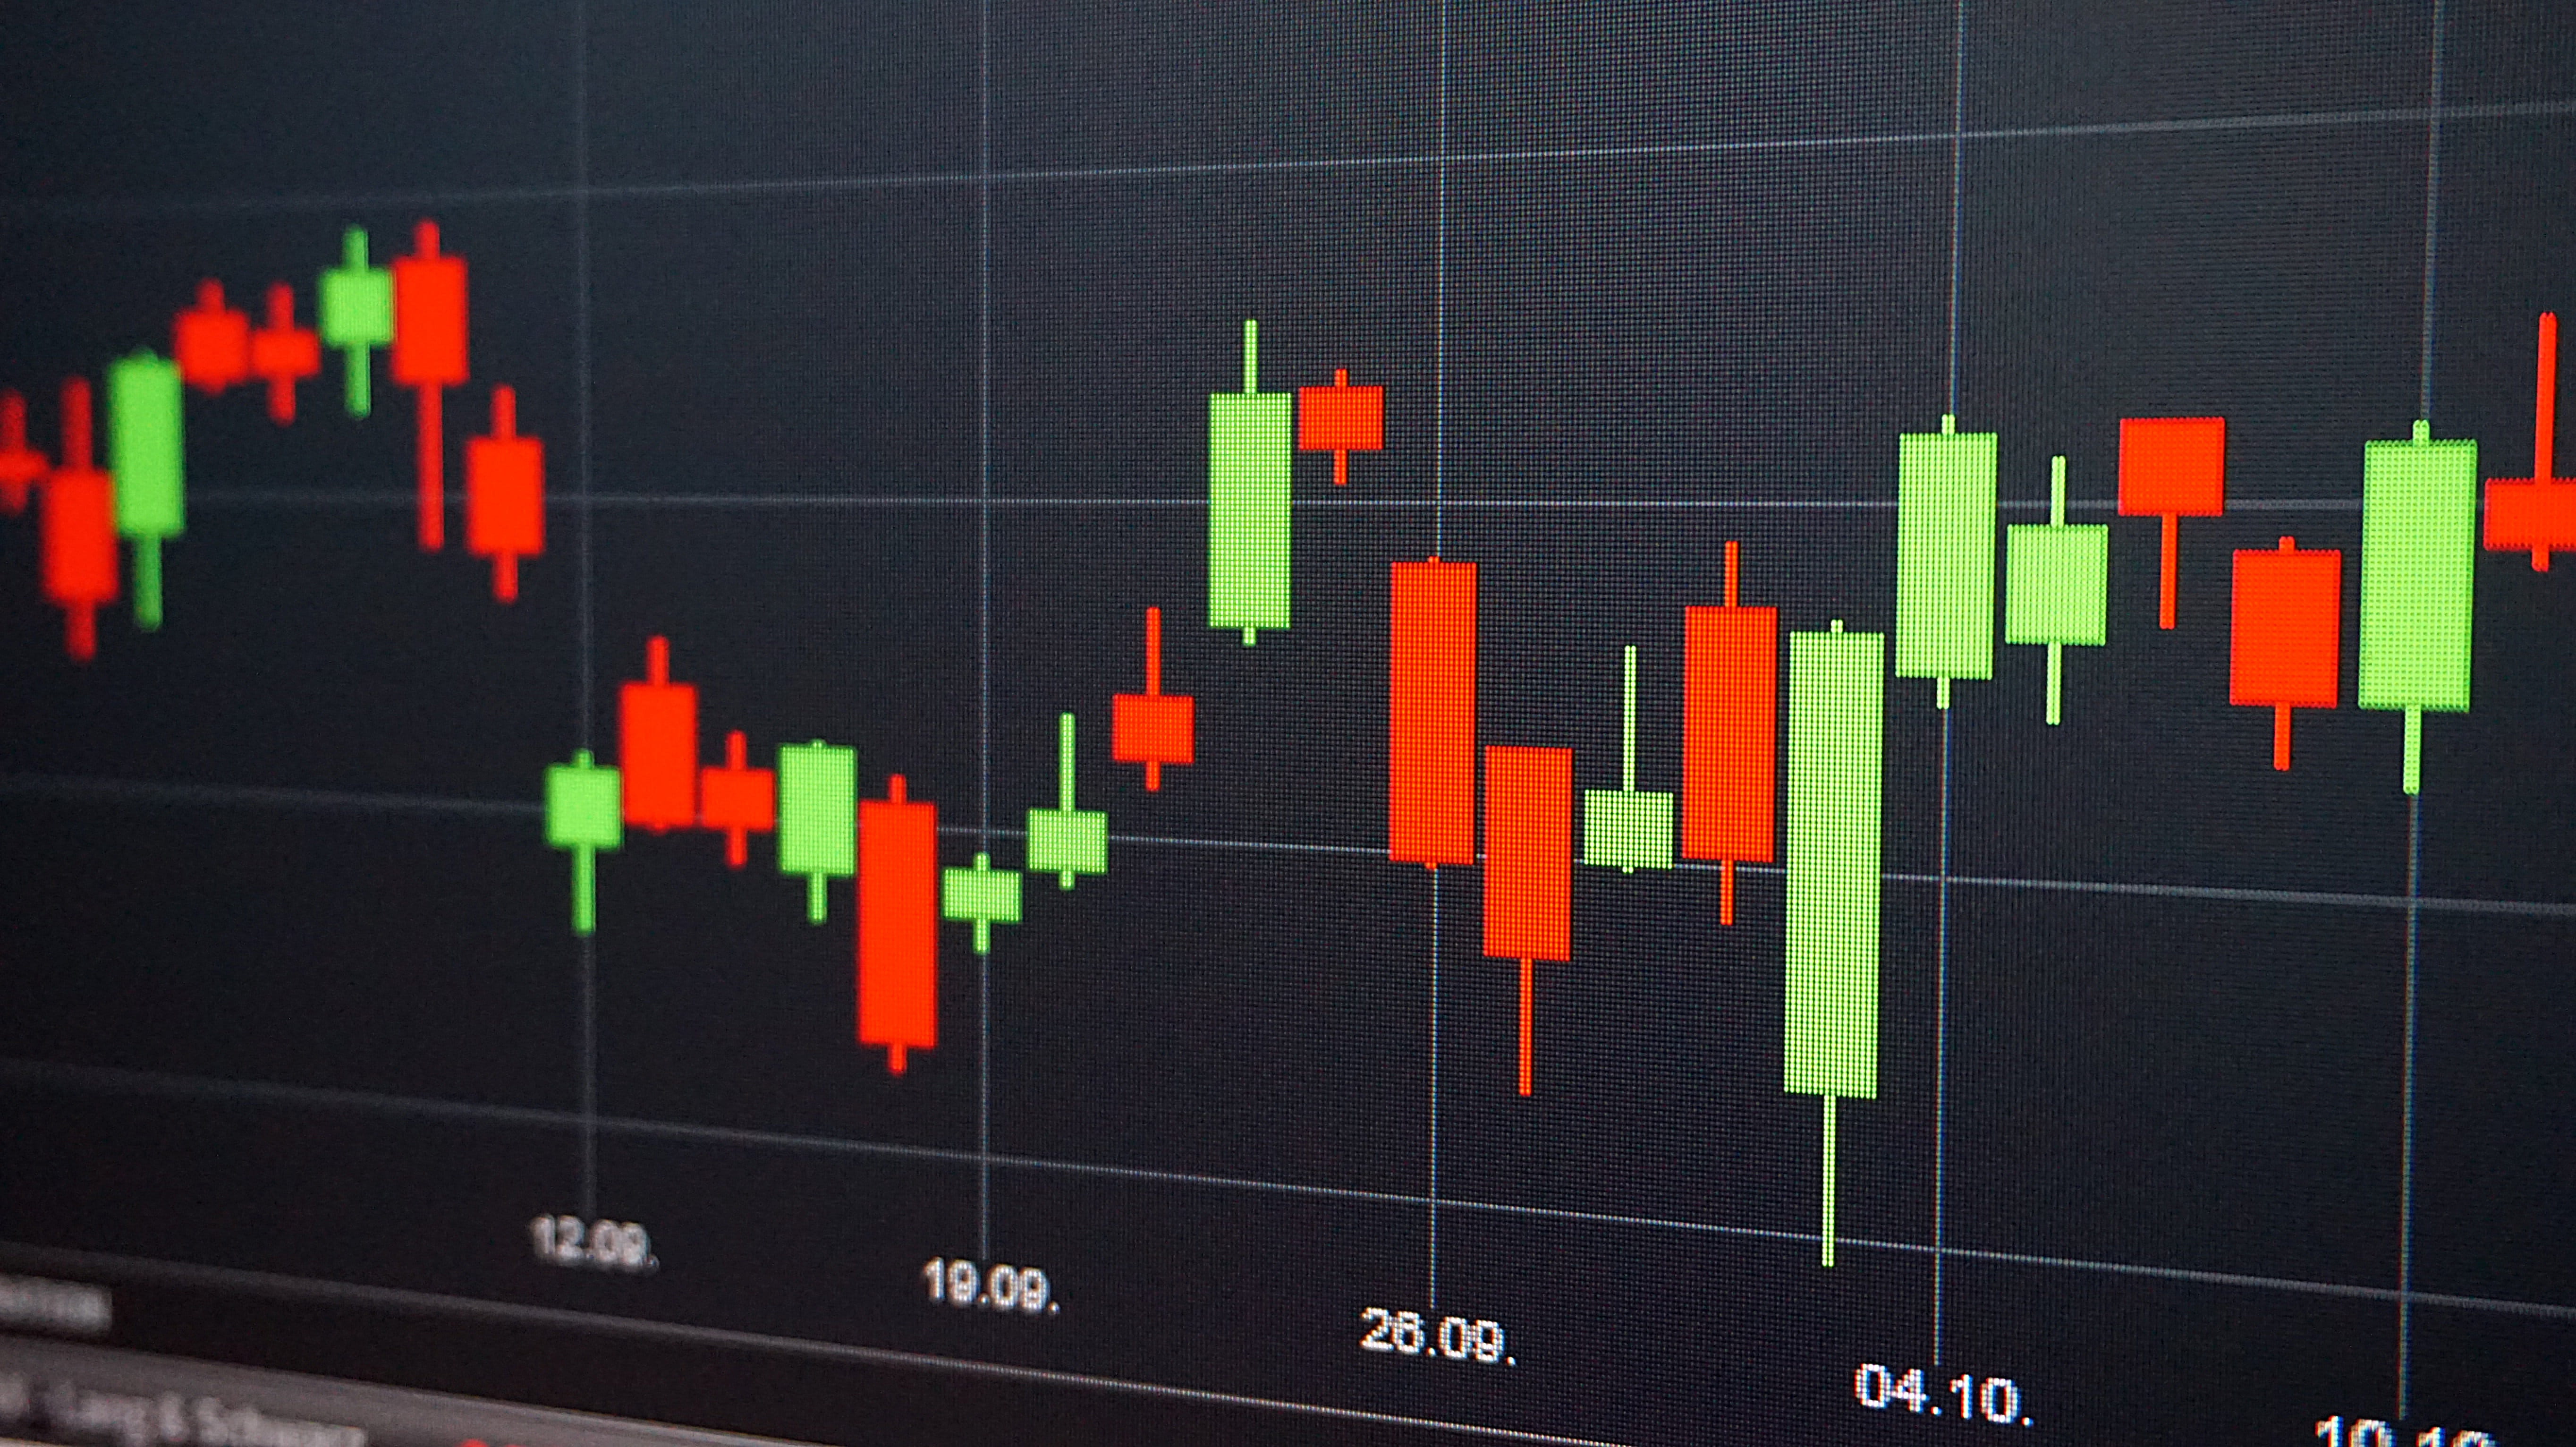

##  🔬Groupname:

### 🔬 Group members:

# Goals of this assignment:

In this assignment, you will be using a technique known as agent-based modeling to explore the emergence of income inequality in economic systems. More specifically, you will:

 * Create a simple economic system of interacting agents (people)
 * Study the trends that emerge from this kind of system with different rules and initial conditions
 * Plot and visualize these trends in a variety of ways
 * Learn how to use two key metrics of income inequality, the Lorenz curve and the GINI coefficient, to explain the distribution of wealth within economic systems

***

# 1. Introduction and motivation

## Agent-based modeling

This assignment is based on the technique of agent-based modeling (ABM). The idea behind agent-based modeling is to simulate the behavior of many "agents" (which can be anything, from people to animals to atoms) which interact by simple rules in a system. Oftentimes, despite the simplicity of the rules that these agents obey, interesting trends emerge from their interactions—this phenomenon, known as "emergence" is responsible for everything from weather patterns to crystal growth to the evolution of life itself.

In our case, the agents we will be simulating will represent people exchanging money with one another in a small economic system. The rules they obey are based on the "Yard Sale Model" developed by physicist Airban Chakraborti. Briefly, it assumes that wealth transfers from one person to another by overpaying or underpaying for the traded goods. In other words, it assumes that every time two people financially interact (by buying or selling something), one of them "loses" the transaction (by overpaying or accepting less than the item is worth) and the other "wins." For example, imagine that you are buying a toaster from someone at a yard sale, and you pay 100 NOK ($\approx$11 USD) for it. If the toaster's "real" value is 120 NOK ($\approx$13.5 USD), you have in effect earned 20% on your investment (assuming you are later able to sell the toaster at its actual market price). The seller, on the other hand, has effectively lost this money since they sold their toaster below market price—or, more accurately, they have transferred the money over to you. Thus, in each trade, the two interacting agents "bet" a certain amount of money (in this case, 20 kr) which goes to the winning party.

The model further assumes that the people trading will only ever trade a relative portion of their wealth, since no one wants to go bankrupt on a single trade. In practice, this means that the amount that is bit is usually a percentage of wealth of the poorer agent in the trade, to avoid agents with large amounts of wealth constantly bankrupting their peers.

The model is nicely summarized in the article [*Is Inequality Inevitable?*](https://www.scientificamerican.com/article/is-inequality-inevitable/) by Bruce M. Boghosian published in The Scientific American.

-----
# 2. Setting up the Simulation

## Importing the necessary libraries

We begin by importing the necessary libraries: numpy, matplotlib, and random (for random number generation). To make our plots pretty, we'll use the seaborn style.

In [1]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
import random

## The coinflip function

Much of the simulation we'll be constructing is driven by random interactions where each agent has a 50% chance of winning, like a coin flip. So, the first thing we will need a function that simulates this coin flip. When run, it should return either True or False with a 50% probability.

To implement this function, we'll be using the method numpy.random.choice(). You can find the documentation on this method [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html).

### 🔬 Task: Code the coinflip function 

In [2]:
# Write the coinflip function here
# the function should take no argument and return either True or False

def flipCoin():
    
    
    #insert return statement here

---
# 3. Simulating trades between multiple agents

## Elector Function

Next, we will need a function that will choose two agents to interact. We'll call this the *elector function* since it randomly "elects" two agents to trade (out of a list of all possible agents) each time it is run.

#### Outline:
 * Call the function "elector". The function should take in a list of indexes 
 * Copy and store the list with the function list.copy() to avoid modifying it each time we run the function 
 * Take a random index from the copied list and remove the elected index from the list, so that it doesn't get double-counted 
 * Elect another index from the edited list 
 * Return the two elected indexes in a new list

## 🔬 Task: Make the elector function

In [3]:
def elector(listvar):
    """
    Takes a list of numbers or agents, returnes two different agents in a list who will then trade 
    """
    # First copy the index list so we dont modify it 
    
    # Then pick a random index and remove it from the list
    
    # Repeat, however now removing it is unnecessary

    # Return the two elected agents as a single list, with the first elected as arg nr 0 and the second as arg nr 1


### Testing the elector function

To test the elector function to see if it works, run the cell below. 

*(Note: these kinds of tests, known as unit tests, are commonly-used in professional software development. When you are writing your own functions from scratch, it's often a good idea to write unit tests beforehand so you can make sure you're on the right track)*

In [4]:
agents2 = 5 # making a number of agents greater than 2

agentslist = [i for i in range(agents2)] # Making their indexes

#Printing the indexes then what the elector function outputs
def test_elector():
    e1,e2 = elector(agentslist)
    if e1 != e2 and e1 in agentslist and e2 in agentslist:
        print("The function is working as it should, it returns two separate items from the list.")
    elif e1 == e2 and e1 in agentslist and e2 in agentslist:
        print("The two indexes are the same! Check if you remove the index from the copied list.")
    elif e1 != e2 and e1 not in agentslist or e2 not in agentslist:
        print("The indexes are not equal, but one or both of them does not exist in the list!")

#Calling the function
test_elector()   

The function is working as it should, it returns two separate items from the list.


## Trading Function
Next, we will create a simple function to simulate an interaction (trade) between two of the agents. 

#### Outline:
* This function should take as input a list with two arguments, corresponding to the wealth of the elected agents 
* Then, the function should check who is the wealthiest (or if they have equal wealth) using a set of if-tests.
* The agent with the least wealth should then be chosen as the basis for the trade. That is, their wealth will be used to decide how much money is "bet" on the trade
* Next, the coinflip function should be called to see who wins the trade 
* Next, the wealth of each agent should be updated by adding/subtracting the money won/lost from the respective agents
* Finally, the function should return a list with the updated wealth values, in the same order as the input

You can assume that the "bet" corresponds to 20% of the wealth of the poorer of the two agents.

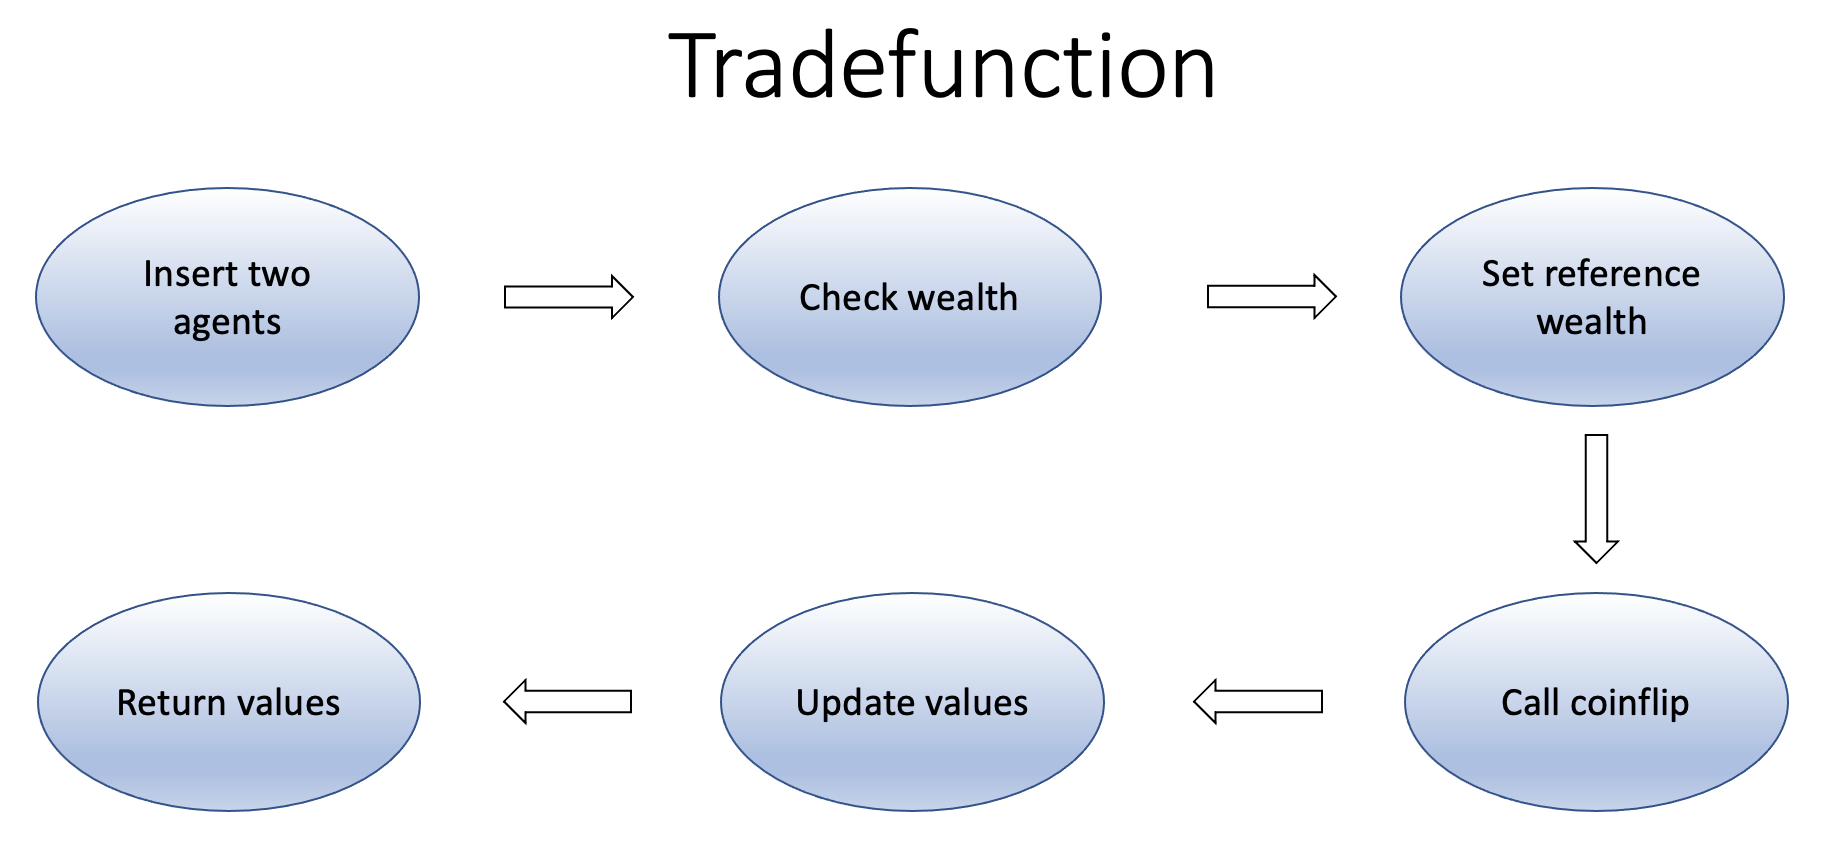

#### Tip: Boolean multiplication
For updating the values we could use another set of if tests. However, a more elegant way to do this update is by exploiting the properties of boolean multiplication. In python, boolean statements like "coinflip == True" will themselves be interpreted as either "True" or "False", which is equivalent to 1 or 0. If you multiply something with a boolean statement, this is equivalent to multiplying by 1 for a true statement or 0 for a false statement. This means that we can account for both the possibility of a win and the possibility of a loss in the same statement, by multiplying the changes in value by boolean, as follows

 * newvalue0 = (oldvalue0 + bet) * (coinflip == True) + (oldvalue0 - bet) * (coinflip == False)
 * newvalue1 = (oldvalue1 - bet) * (coinflip == True) + (oldvalue1 + bet) * (coinflip == False)

(If this doesn't make any sense, don't worry—it's also perfectly fine to use if-tests, it just requires more lines of code!)



### 🔬 Task: Make a one-time trading function

In [5]:
# Here we make the general function for a one time trade between two agents
# The function takes a list of two agents 

def traderfunc(people):    

    #check who has least wealth, they will become the standard for how much is gambled 
    
    #Call the coinflip function here
    
    #Write the boolean statement which defines the new wealth or an if-test that accomplishes the same.
    
    #Return a list with the updated wealth values

### 🔬 Task: Test the newly coded function by applying two values as input to see if it works  

You can run the cell below to test if your trading function has worked. If it works as expected, the first list should read [1000, 1000] and the second should have added 20% of the value to one entry and subtracted it from the other.

In [6]:
#create two values
value1 = value2 = 1000

#print the old values against the new ones, does it change?
print([value1,value2])
print(traderfunc([value1,value2]))

[1000, 1000]
[1200.0, 800.0]


---

# 4. Simulating a system of interacting agents (pure economic liberalism) 

Now, we have all the components we need to simulate a system with multiple interacting agents. So, in this section we will set up and run a complete simulation of multiple interacting agents.

### Initializing the system

Our first objective then is to initiate the system. Here we will need to set:
* The number of agents (6-12 agents)
* The number of iterations (20000-100000)
* The starting capital (money) that each agent has at the beginning of the simulation (go nuts)

In [7]:
#Initializing values in the simulation
num_agents = 10 # Number of agents present in our system
starting_capital = 100000 # starting capital
N = 20000 # number of iterations for the trading period

### Structuring the data

Next, we need a way to store the data from the simulation. Here, the easiest method is to create an array (matrix) where each row corresponds to a particular iteration, each column corresponds to a particular agent, and each entry in the matrix is the money held by that agent during that iteration. 

In other words, this array should have dimensions $$iterations \times agents $$

When indexing this array, the first index (the row) will be the iteration and the second index (the column) will be the agent. So when calling the total time development of agent n, you would write matrix[ : , n-1 ]. If you want all the values of the agents at m iteration you would write matrix[ m-1 , : ]. If you want the single value of agent n at iteration m you would write matrix[ m-1 , n-1 ]

We will also need to create a list of indices, which will allow us to identify the agents for the elector function. That is, a list of length num_agents, where each entry is the index of one of the agents [0,1,2,3,4... etc.]

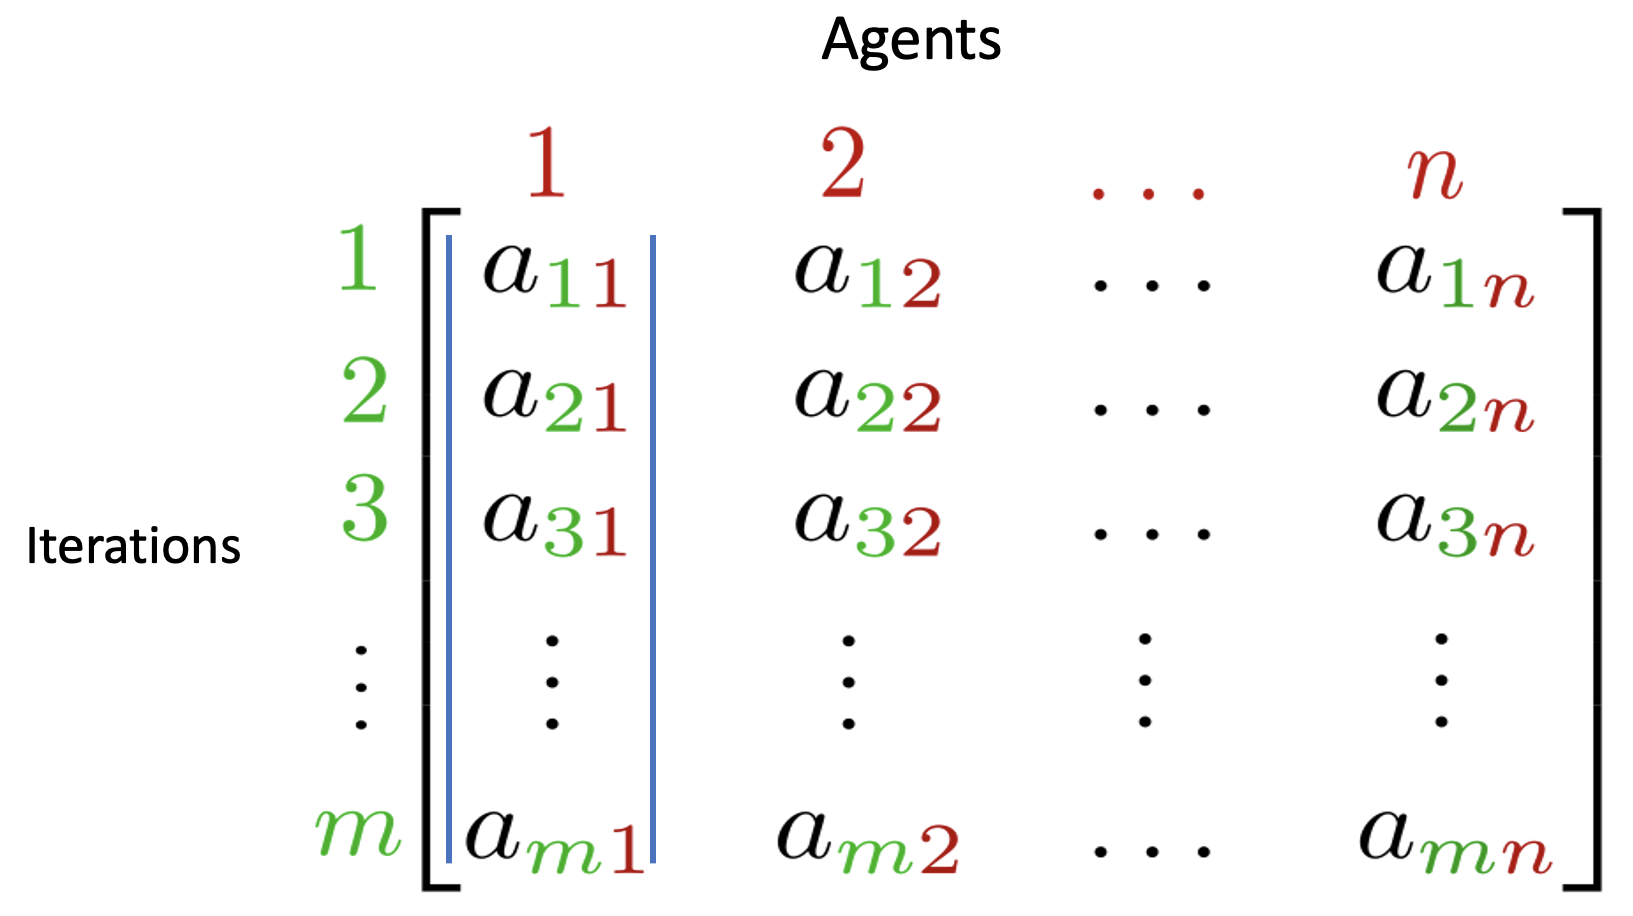

#### Outline:
1. Create an array of the specified dimensions (iterations x num_agents). Call it "matrix_sys1"
2. Initialize the array by setting all entries in the first row to the starting capital
3. Create a second list with the indices for the agents. Call it "index_agents"

In [1]:
# Making the array of dimension (N, number of agents). Call it matrix_sys1

# Fill in the initial conditions
  
#Create a list of the indexes of the corresponding agents in the matrix


### Running the simulation
Now that the system is initiated all that remains is to run the simulation. This is easiest done within a loop, such as a for-loop.

#### Outline:
 1. Begin with initilizing the next cycle of the simulation by updating the next values of the matrix with the old ones
 2. Using the elector function, elect the two agents that are going to trade
 3. Run the two elected agents through the trader function and update their values
 4. Repeat for N-1 iterations (to avoid a problem during the final execution of the loop)
 
 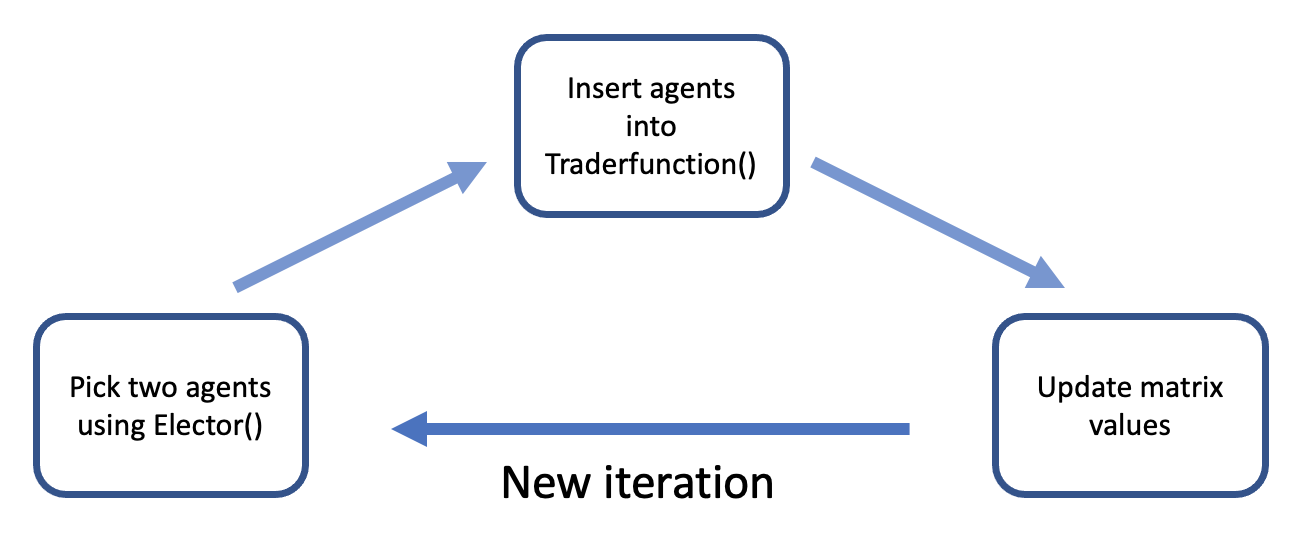

In [9]:
# The trade loop
for i in range(N-1):
    #Making sure that the previous value for the agents who dont trade is not lost
    #Update the next iteration of values with the old ones

    #Electing two different agents to trade, then giving them their new value
    #Use the elector function with index_agents as argument to get two agents eligible to trade
    
    #Use the trader function and the elected agents at iteration i+1 as input in the trader function
    
    #Update the values with newval1 and newval2

## Visualizing the results

Now that we have results from our simulation, we need to visualize them. The simplest way to do this is with a standard 2D graph of wealth vs. time, where iterations are on the x-axis wealth (money) for each agent is on the y-axis. Do do this, we will loop over each agent and plot their wealth by selecting their index from the matrix.

### 🔬 Task: Plot the results using a traditional graph

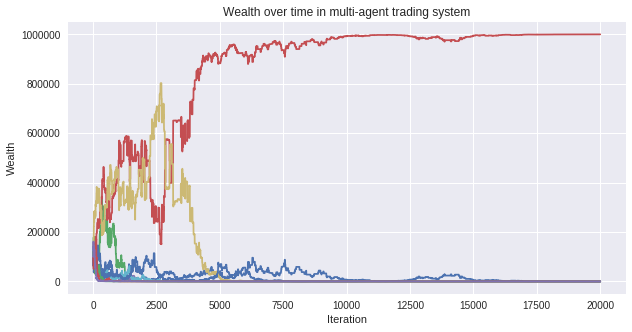

In [10]:
#Plotting the results
fig, ax = plt.subplots(figsize=(10, 5))
plt.ylabel("Wealth")
plt.xlabel("Iteration")
plt.title("Wealth over time in multi-agent trading system")

for i in range(num_agents):
    #plot the development of all the individual agents wealth
    ax.plot()

### The limitations of the normal graph

As we can see from our graph the value of the agents does indeed change over the iterations. However in the beginning when all the agents have relatively similar levels of wealth it can be hard to track their individual development. 

To better see this development, we can use the function plt.pcolormesh, which allows us to see the values from a top-down view—that is, it creates a kind of heat map of the wealth of each agent. However, because it's traditional to read time-development graphs from left-to-right (rather than top-to-bottom, as this array is structured) we will have to plot the transpose of our matrix, which swaps the rows for the columns.

### 🔬 Task: Plot the pcolormesh of the agents

Text(0.5, 1.0, 'Heatmap of how the value develops over time')

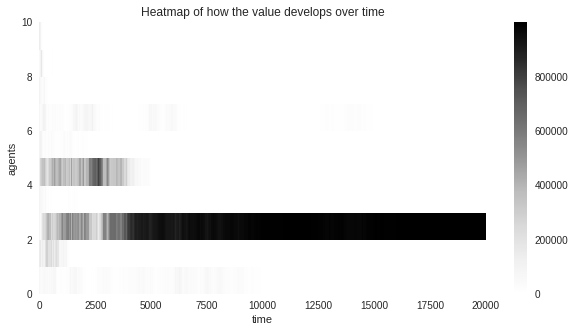

In [11]:
# Creating the figure and setting size
fig, ax = plt.subplots(figsize=(10, 5))
#use np.transpose to transpose the system matrix 
matrix_sys1_tr = np.transpose(matrix_sys1)
#input the transposed matrix into the heat pcolormesh function
plt.pcolormesh()
plt.colorbar()
# Add labels on the x and y axis
plt.xlabel("time")
plt.ylabel("agents")

# Add a title
plt.title("Heatmap of how the value develops over time")

The heatmap above is hopefully a little more helpful when looking at development of the system over time.

### 🔬Task: Analyze the development of the system over time.

What do trends do you observe in the development of this system over time? Are there any emergent behaviors that you would not necessarily have expected, based on the rules we've created?

**Write in this box:**

---

# 5. Wait, what did we just simulate?
Now that we've simulated a system, it's time to take a step back and think about what we've done.

In essence, we have used some basic assumptions and rules to create a system where agents trade with each other under no restraints. In other words, within the rules specified by the yardsale model we have essentially simulated the most "free" system possible—the open market, where agents exchange wealth with each other without any regulations. This kind of system is known as *economic liberalism.* Naturally, this is a highly simplified model, yet it captures certain key features of this kind of system—specifically, the way wealth tends to accumulate to certain agents despite everyone trading freely.

Later on, we will modify this simulation to see how the addition of economic regulation impacts wealth distribution within our system.

#### A note on the number of agents and emergent behavior
 
Note: the more agents you decide to put in your system, the more iterations you need to see the emergent behavior. This is because only a single pair of agents trade each iteration. So when testing how the number of agents affects the system, it's helpful to keep the number of agents moderately low (i.e., 5-20).

# 6. Metrics for Income Inequality: the Lorenz curve and the GINI coefficient

As we've seen so far, in a free system like this money will tend to accumulate to a small number of agents, essentially creating huge wealth disparities. However, in order to compare different types of economic systems, it's helpful to have a more precise was of quanitfying these disparities. Two of the most commonly-used metrics are Lorenz curves and GINI coefficients.

Lorenz curves essentially provide a graphical representation of the wealth distribution in a society. A Lorenz curve graphs the percent of a population (0-100%) against the cumulative amount of wealth held by that percent of the population. In a perfectly equal society, this would produce a straight, diagonal line. The more unequal the society, the more curved the resulting plot.

Another way to look at this plot is that the area under the curve essentially corresponds to the equality of the system—the more area, the more equal the system is. This leads to our second metric, the GINI coefficient. The GINI coefficient is essentially a measure of the difference between the system under examination and a perfectly equal system. In practice, you find it by taking the difference in area between the plotted Lorenz curve and the diagonal line, and dividing it by the total area under the diagonal line (which represents perfect equality). In other words, divide the area between the Lorenz curve and diagonal (marked A in the figure below) by the total area (A + B). This will produce a number between 0 and 1, where 0 is a perfectly equal system and 1 is a perfectly unequal system.

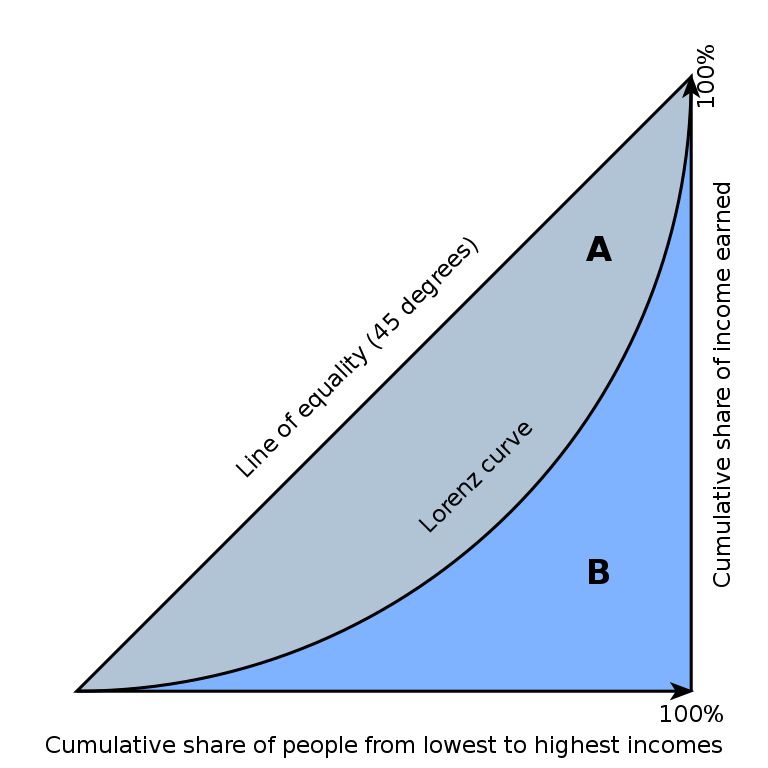
Courtesy of https://en.wikipedia.org/wiki/Gini_coefficient

You can find a more detailed explanation of Lorenz curves and GINI coefficients at [Khan Academy](https://www.khanacademy.org/economics-finance-domain/ap-microeconomics/ap-consumer-producer-surplus/inequality/v/gini-coefficient-and-lorenz-curve). The video is embedded below.

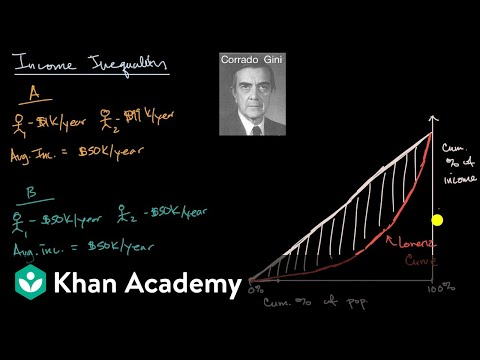

In [12]:
from IPython.display import YouTubeVideo 
YouTubeVideo("y8y-gaNbe4U",width=640,height=360)

Below are functions for calculuating the GINI coefficient and Lorenz curves. Note that both of these metrics are a snapshot of the system in time—for this reason, we'll need to choose a particular iteration to examine. We could choose any iteration, but for simplicity's sake we'll chose the last one, after the system has (most likely) settled into a fairly stable state.

Note that when using the GINI and Lorenz functions we've defined here, the list or array you input has to be sorted small to large. Use the function np.sort()

Although we could calculate the GINI coefficient (G) by using the graphical method described above, there is a more direct algorithm that can be used:

$$G = \frac{ \sum_{i=1}^n \sum_{j=1}^n | x_i - x_j |}{2n^2 \bar{x}}$$

Where $\bar{x}$ is the mean value of the array x.

In other words, the GINI coefficient is equal to the absolute difference between all elements divided by two times the number of agents multiplied by the mean wealth of the agents.

The Lorenz function plots the cumulative sum of the agents income against the sum of money accumulated if it were equally distributed between the population.

In [13]:
def gini(matrix_slice):
    #INPUT: This function is supposed to take in a 1D array
    #OUTPUT: This function should output the GINI coeff
    
    #Declaring the sum variable
    s = 0
    
    #Further we declare the population number, you have to use ndarray.flat for the function len to work
    n = len(matrix_slice.flat)
    
    # Further we find the average wealth 
    matrix_avg = np.mean(matrix_slice)
    #Using a dobble for-loop we calculate the absolute difference between all agents
    for i in range(len(matrix_slice.flat)):
        for j in range(len(matrix_slice.flat)):
            s += np.abs( matrix_slice.flat[i] - matrix_slice.flat[j] )
            
    gini_coeff = s /(2*n**2 * matrix_avg)
    return gini_coeff


def lorenz(matrix_slice):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = matrix_slice.cumsum() / matrix_slice.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    #we insert the values into our matrix
    return np.insert(scaled_prefix_sum, 0, 0)

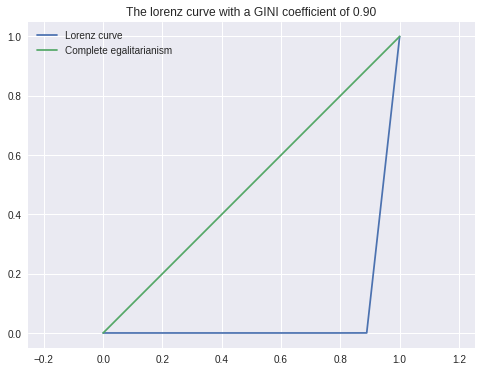

In [23]:
last_iteration = np.array(np.sort([matrix_sys1[-1,:]])) #sort the agents by income
lorenz_curve = lorenz(last_iteration) #we make the lorenz curve for the sorted last iteration

ginicap = gini(last_iteration) #calculating G for the last iteration

#plotting the results 
fig,ax = plt.subplots(figsize = (8,6))
ax.axis('equal')

ax.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve,label = "Lorenz curve")
# plot the straight line perfect equality curve
ax.plot([0,1], [0,1], label = "Complete egalitarianism")
plt.title(f"The lorenz curve with a GINI coefficient of {ginicap:.2f}")
ax.legend()

### 🔬Task: From what you just learned, what does the Lorenz graph and the GINI coefficient tell you about the liberalistic system? Write below.





---

# 7. Elaborating our model with a wealth limit (softcap)

Although some economies in the world have historically resembled perfect economic liberalism, most end up adding in some kinds of rules or regulations to prevent all the wealth from accumulating to a single agent. How can we simulate this in our system?

One way of simulating this is by adding in a wealth limit, where when the wealthy hit the wealth limit some of their wealth gets redistributed to less wealthy agents. When defining this limit, we have the choice between two options: a "hard cap" or a "soft cap". A hard cap refers to a strict limit, which cannot be overshot. In real life, this would mean that the government (or other ruling body) would make it so that it is more-or-less impossible to aquire wealth above a certain threshold, either removing or blocking any additional income beyond that threshold. In real life, this is very seldom done. Rather, governments usually impose some kind of gradation in the limits, such that income above the limit (for example) is subject to increasingly higher taxes. In that way, it is still possible to go above the threshold, but it becomes increasingly harder the more you earn. This is the idea behind a soft cap.

How do we implement this soft wealth limit in our system? We will start by initiating the system as we did before, but this time our simulation will include a variable which defines the wealth threshold. We will base this threshold on the overall wealth median. We will also have to decide how much wealth above this cap will be redistributed, in the form of a percentage (ideally low, since higher percentages bring us closer and closer to a hard cap). 

The next thing to add is a part of the optional section of this task so it can be neglected if wanted, but add 3 empty lists, these will be used to store who is at the wealth median, who is under it and lastly who is at it.

In order to make future iterations on this simulation easier to do, let's also turn our initialization into a function, and run that function.

### 🔬 Task: Write a function for initializing system without the additions to the code described above.

In [15]:
# Write the initation function here

def initSystem(N,sKap,nrOfAgt):
    #First we make the matrix with the correct dimentions

    #Then we need to fill the matrix with initial values

    #Then we make the indexlist for the agents

    #Return all of the values

In [16]:
# Initiate the system here, with a suitable number of iterations, starting capital and number of agents.
# Call your data structure "matrix_sys2" to make the plotting functions work later on

# Define the wealthlimit and the percent of wealth redistributed

# Declaring a variable for the wealth median

# Here you should make the empty lists that will hold how many are under, at or over the wealth median


Now that the system is initiated we will run our simulation. Again, we will base the new system on the old liberalistic one, however now for each iteration we need to check if the agents are over the wealth cap. If they are, a set percentage of their wealth should go to the poorest agent (note: this kind of direct, 1-to-1 trasfer is just one way of doing the redistribution. There are many more, which you are welcome to explore!). An easy way of finding the poorest agent is with the function numpy.argmin(), which is what we'll use here.

**Optional:** Later, we'll want to see how our wealth redistribution scheme worked, and to do this we may want to see how many people are over, under, or at the wealth median. If you with to do this, declare 3 empty lists, every iteration these lists should be filled with how many people are over, under or at the wealth median. We'll plot this data later on.

### 🔬 Task: Simulate the trading system (like you did above) with the addition of a wealth cap

In [17]:
# Make the trading for loop in this code box
for i in range(N-1):
    #carry over the values from the previous iteration

    #Use the limits over, under, at (the median) to sort the agents 
    #Update the limits for each iteration

    #Check if the agents are over, under or at the median and apped the counters to their respective lists
    
    #choose two agents to conduct a trade
    
    #calculate new wealth
    
    #update wealth for chosen angents

    #create a for-loop looping over all the agents 
    
        #check with an if test if the agents are above x times the wealth median
            
            #use np.argmin to find the index of the poorest agent in the i+1 iteration
            
            # Giving some of the wealth to the poor agent
            
            #Remove the same amount from the rich agent

Now that the system is done with its calculations it is time to visualize what we have done. First, make a figure of the "normal" 2D graph with the x axis being the iterations and the y axis being the value. Then create the second figure which will be the heatmap of the same matrix, as discussed earlier this makes it easier to see the development of the individual agents.  

If you did the optional part as well, you can now create a graph which includes the 3 different lists you filled with values. This allows you to see how the redistribution scheme affected those with wealth above/below the median.

### 🔬 Task: Create two figures a graph and a heatmap of the system, (optional) plot the 3 lists you filled in a third figure.

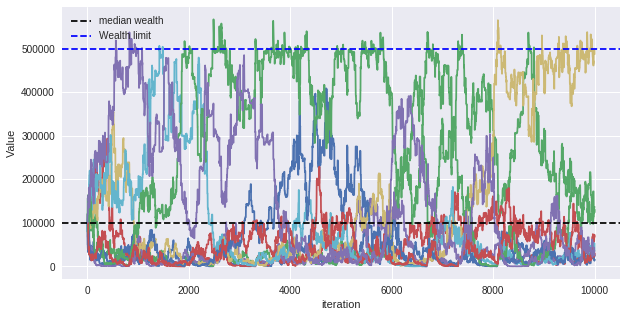

In [18]:
# Create the normal figures here
fig, ax = plt.subplots(figsize=(10, 5))
plt.ylabel("Value")
plt.xlabel("iteration")

#plot the agents and their wealth development wiht a for-loop

    
ax.axhline(y = starting_capital,color ="black", linestyle = "--", label = "median wealth")
ax.axhline(y = lim*starting_capital,color ="blue", linestyle = "--",label = "Wealth limit")
plt.legend(loc = "upper left")

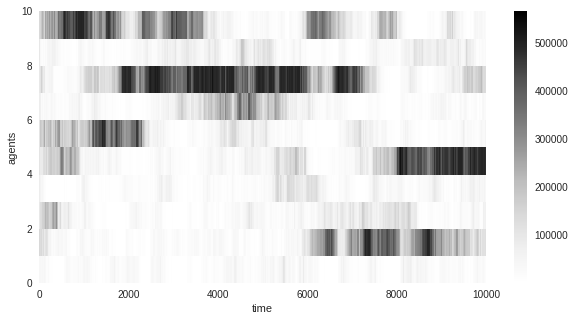

In [19]:
# Create the heatmap here

fig, ax = plt.subplots(figsize=(10, 5))

#create a transposed matrix
matrix_tr = np.transpose(matrix_sys2)
plt.pcolormesh(matrix_tr)
plt.xlabel("time")
plt.ylabel("agents")
plt.colorbar()

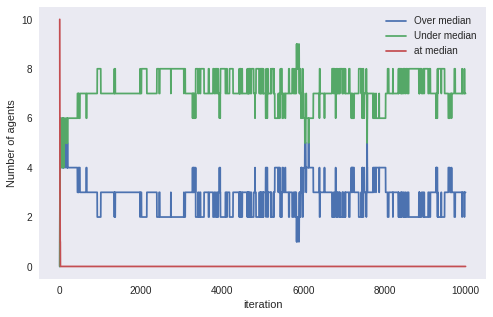

In [20]:
# (Optional) Plot the 3 lists with over, under and at median here
fig, ax = plt.subplots(figsize=(8, 5))
ax.grid()
plt.ylabel("Number of agents")
plt.xlabel("iteration")

#plot the filled limit lists here

plt.legend()

As we can see from these graphs, this system is far more egalitarian than the first liberalistic system we modeled. This comes as no suprise given that this system includes a mechanism for wealth redistribution. Whereas the liberalistic system has a clear tendency to result in one or more oligarchs, the wealth cap creates more dynamic shifts in wealth between the agents. That is, there are still clearly wealthy agents, however the divide between what is wealthy and what is poor is far less than in the liberalistic system.

We can get another perspective on the inequality in this system using the Lorenz curve and GINI coefficient functions we defined before:

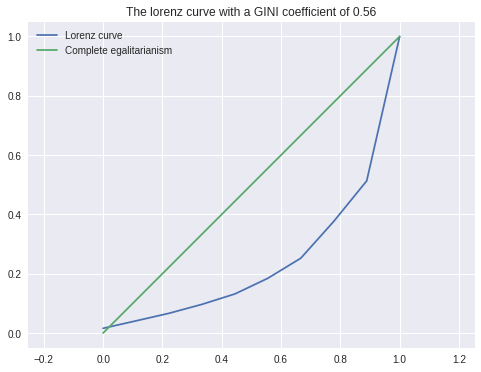

In [21]:
last_iteration = np.array(np.sort([matrix_sys2[-1,:]]))
lorenz_curve_softcap = lorenz(last_iteration)

fig,ax = plt.subplots(figsize = (8,6))
ax.axis('equal')

ax.plot(np.linspace(0.0, 1.0, lorenz_curve_softcap.size), lorenz_curve_softcap,label = "Lorenz curve")
# plot the straight line perfect equality curve
ax.plot([0,1], [0,1], label = "Complete egalitarianism")
plt.title(f"The lorenz curve with a GINI coefficient of {gini(last_iteration):.2f}")
ax.legend()

Let's compare the two systems we've simulated.

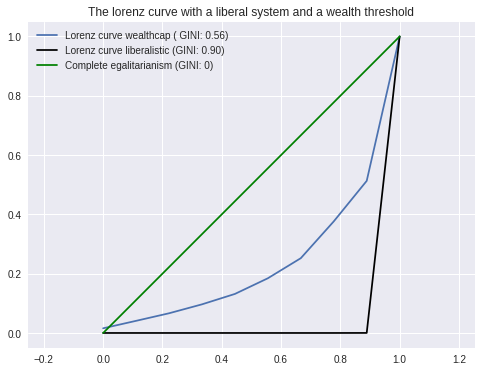

In [22]:
fig,ax = plt.subplots(figsize = (8,6))
ax.axis('equal')

ax.plot(np.linspace(0.0, 1.0, lorenz_curve_softcap.size), lorenz_curve_softcap,label = f"Lorenz curve wealthcap ( GINI: {gini(last_iteration):.2f})")
ax.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve, "k" ,label = f"Lorenz curve liberalistic (GINI: {ginicap:.2f})")
# plot the straight line perfect equality curve
ax.plot([0,1], [0,1], "g" , label = f"Complete egalitarianism (GINI: {0})")
plt.title("The lorenz curve with a liberal system and a wealth threshold")
ax.legend()

### 🔬 Task: Write what you observed in your system and compare it to the liberalistic system, did you expect this development to happen?

**Write in this box:**

---

### 🔬 Task: Try to change the limit coefficient and the percentage of wealth redistributed and write under how it impacts the system.

**Write in this box:**

---

### 🔬 Task: Look at the graphs and explain what this means for the two systems.

# 8. Further development

Now that you have simulated two different economic systems, you can try your hand at further developing the model to simulate more complicated economies. Here are a few other systems you might try to simulate:

 * Basic universal income
 * Periodic redistribution
 * Lottery, where one agent suddenly gets a drastic boost in money
 * Unequal starting position
 * Agent skills:  agents have a chance at getting better after a won trade